In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df=pd.read_csv("train_loan_prediction.csv")

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#preprocessing

In [41]:
print(type(df))
print(df.shape)
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
(614, 13)
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
Loan_ID               0
Gender               13
Married     

In [42]:
df1=df.dropna()
print(df1.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Text(0, 0.5, 'No. of Applicants')

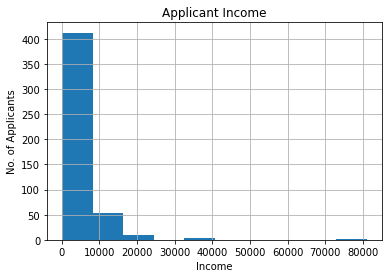

In [43]:
df1['ApplicantIncome'].hist(bins=10)
plt.title("Applicant Income")
plt.xlabel("Income")
plt.ylabel("No. of Applicants")

Text(0, 0.5, 'No. of Co-Applicants')

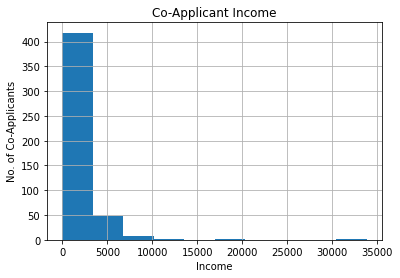

In [44]:
df1['CoapplicantIncome'].hist(bins=10)
plt.title("Co-Applicant Income")
plt.xlabel("Income")
plt.ylabel("No. of Co-Applicants")

Text(0, 0.5, 'No. of Applicants')

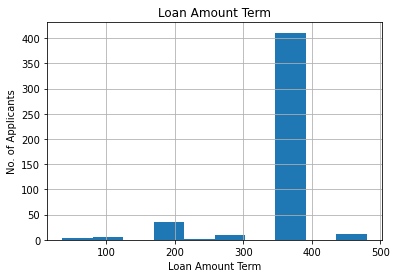

In [45]:
df1['Loan_Amount_Term'].hist(bins=10)
plt.title("Loan Amount Term")
plt.xlabel("Loan Amount Term")
plt.ylabel("No. of Applicants")

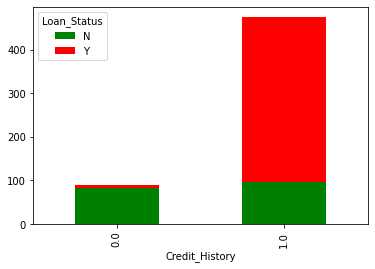

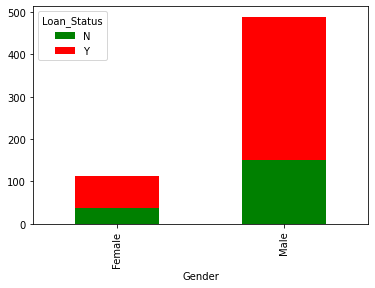

In [46]:
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','red'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

Text(0, 0.5, 'No. of Applicants')

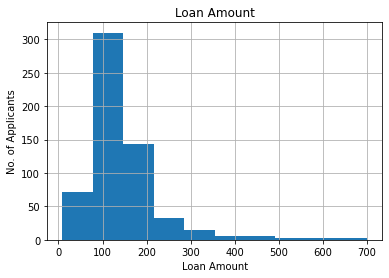

In [47]:

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount'].hist(bins=10)
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("No. of Applicants")  

In [48]:
df2 = df1.drop(["Loan_ID"],axis=1)

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [50]:
df2['Gender'] = le.fit_transform(df2['Gender'].values.reshape(int(-1),int(1)).ravel())
df2['Married'] = le.fit_transform(df2['Married'].values.reshape(int(-1),int(1)).ravel())
df2['Self_Employed'] = le.fit_transform(df2['Self_Employed'].values.reshape(int(-1),int(1)).ravel())
df2['Loan_Status'] = le.fit_transform(df2['Loan_Status'].values.reshape(int(-1),int(1)).ravel())
df2['Education'] = le.fit_transform(df2['Education'].values.reshape(int(-1),int(1)).ravel())
df2['Property_Area'] = le.fit_transform(df2['Property_Area'].values.reshape(int(-1),int(1)).ravel())
temp = np.array(df2['Dependents'][:])
for i in range(len(temp)):
  if temp[i] == '3+':
    temp[i] = '3'
df2['Dependents'[:]] = temp.astype(int)
temp

#df2.head()


array(['1', '0', '0', '0', '2', '0', '3', '2', '1', '2', '2', '0', '2',
       '0', '0', '0', '0', '1', '0', '0', '0', '2', '0', '0', '1', '0',
       '3', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '2', '1', '2', '0', '0', '1', '2', '0', '3', '0', '0', '0',
       '0', '1', '3', '0', '0', '2', '0', '3', '0', '0', '1', '3', '0',
       '2', '1', '0', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0',
       '0', '0', '2', '0', '1', '2', '2', '3', '0', '1', '0', '0', '0',
       '0', '0', '2', '0', '1', '0', '0', '0', '0', '3', '0', '2', '0',
       '2', '2', '0', '0', '0', '2', '0', '2', '1', '0', '0', '0', '0',
       '0', '2', '0', '3', '1', '0', '0', '0', '1', '2', '0', '0', '0',
       '0', '2', '3', '0', '0', '0', '2', '3', '1', '0', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '2', '1', '2', '0', '0', '0', '0', '0', '0', '3', '1', '3', '0',
       '3', '0', '0', '0', '2', '0', '0', '0', '2', '0', '1', '0

#ML

In [51]:
x=df2.iloc[:,df2.columns != 'Loan_Status']
y=df2.iloc[:, df2.columns == 'Loan_Status']

In [52]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [53]:
y.head()

,Loan_Status
1,0
2,1
3,1
4,1
5,1


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3) # implement with test_loan_prediction later

In [56]:
x_train.shape

(336, 11)

In [57]:
y_train.shape

(336, 1)

In [58]:
x_val.shape

(144, 11)

In [59]:
y_val.shape

(144, 1)

In [60]:
np1=df2.values

In [61]:
from sklearn import svm

In [62]:
model1=svm.SVC()
model1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [63]:
svm = model1.score(x_val, y_val)
svm

0.6805555555555556

In [64]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [65]:
model2.fit(x_train, y_train)

LinearRegression()

In [66]:
LinR = model2.score(x_val, y_val)
LinR

0.22997824311506188

In [67]:
import matplotlib.pyplot as plt

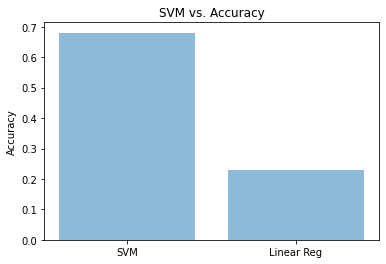

In [68]:
objects = ('SVM', 'Linear Reg')
y_pos = np.arange(len(objects))
performance = [svm,LinR]

plt.bar(y_pos, performance, align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM vs. Accuracy')

plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgbRegressor = xgb.XGBRegressor(
    n_estimators=5,
    reg_lambda=1,
    gamma=0,
    max_depth=10
)
xgbRegressor.fit(x_train, y_train)
y_pred = xgbRegressor.predict(x_val)
mean_squared_error(y_val, y_pred)
temp = np.array(y_val)
correct = 0
for i in range(len(y_val)):
  value = 1 if y_pred[i] >= .5 else 0
  print("Actual: ", temp[i][0],"Predicted: ", value,"  ", y_pred[i])
  if temp[i][0] == value:
    correct += 1
print(correct/len(y_val) * 100, "%")